# Logistic Regression
This week we are going to dive into logistic regression. This is a regression that uses a function that helps us better penalize false positives.

In [6]:
%matplotlib inline
import pandas as pd
from pathlib import Path
import os, sys
import numpy as np
import matplotlib.pyplot as plt

project_dir = Path(os.getcwd()).parent
ex2_path = project_dir/'Octave Code'/'ex2'/'ex2data1.txt'
df = pd.read_csv(ex2_path, header=None)

In [12]:
df.columns = ['exam1', 'exam2', 'label']
X = df.loc[:,['exam1', 'exam2']].values
y = df.label.values
df.head()

,exam1,exam2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [13]:
df.describe()

,exam1,exam2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [33]:
def plot_data(X, y):
    pos_ind = y==1
    neg_ind = y==0
    plt.scatter(X[pos_ind][:,0], X[pos_ind][:,1], color='k',marker='+')
    plt.scatter(X[neg_ind][:,0], X[neg_ind][:,1], color='y')

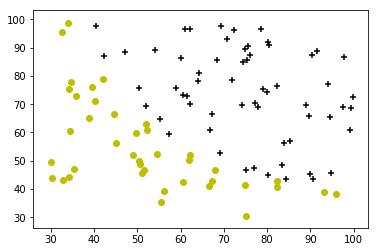

In [34]:
plot_data(X,y)

In [ ]:
def sigmoid(x, derivative=False):
  return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [ ]:
def cost_function_reg(theta, X, y, lamb):
    m = len(y)
    h_th = sigmoid(np.matmul(X, theta))
    